[데이터 분석과 시각화 - 자동차 연비 요인 분석]
- 데이터set: UCI auto mpg.csv
- target col: mpg
- feature col: mpg col을 제외한 나머지 => EDA을 통해해 주요 특성 선택택


[1] 모듈로딩 및 데이터 준비 <hr>

In [138]:
# %pip install matplotlib

In [139]:
# [1-1] 모듈 로딩
import pandas as pd # 데이터 분석 및 전처리 모듈
import numpy as np # 배열을 지원하는 python package
import matplotlib.pyplot as plt # 그래프 시각화 module 



In [140]:
# [1-2] 데이터 분비
Path='../../02.PANDAS/DATA/auto_mpg.csv'
# 첫번쨰 있고, 분리자 True
mpgDF=pd.read_csv(Path)

[2] 데이터 확인 <hr>

In [141]:
# 요약정보
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [142]:
# 타입 불일치: 'horsepower'
# 데이터 특성 체크: 'cylinders' 'origin'


In [143]:
# col별 통계치: 데이터 분포
mpgDF.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [144]:
# 컬럼별 고유값 체크: 이상치/특이값 사전 체크
# Series.unique()
for x in mpgDF.columns:
    print(mpgDF[x].unique(),end='\n')
    print(mpgDF[x].nunique(),end='\n')

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
129
[8 4 6 3 5]
5
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  11

In [145]:
# 객체/인스턴스.__dir__():속성명, method 리스트
mpgDF.__dir__()

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__r

In [146]:
## 데이터 확인 결과: 전처리 진행 필요
## 데이터 값 타입 일치: 'horsepower'
## 이상치 처리: 'horesepower'col -> '?'
## 데이터 특성에 따른 type covert: 'origin','cylinders','model_year'
## 데이터 단위 변경: mpg->kpl를 추가

[3] 데이터 전처리 <hr>

- 3.1(missing Value)체크 및 처리

In [147]:
# - 체크: isna()/isnull()    
mpgDF.isna().sum()
# 집계함수는 행방향 함수->axis=1, 열방향 함수 ->axis=0

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

- 3.2 horespower 컬럼 처리 <hr>

In [148]:
sr1=mpgDF['horsepower'].value_counts()
sr1['?']
# ? 값의 인덱스를 찾아서 drop
index1=mpgDF[mpgDF['horsepower']=='?'].index
mpgDF.drop(index=index1)
# ?를 nan로 변경 후 drop
mpgDF.replace('?',np.nan,inplace=True)
mpgDF.isna().sum()
mpgDF.dropna(inplace=True)

In [149]:
# 타입변경
mpgDF['horsepower']=mpgDF['horsepower'].astype('int64')

- 3.2 데이터 특성에 따른 type covert: 'origin','cylinders','model_year' <hr>

In [150]:
# int타입을 => category 타입으로 형변환
mpgDF['origin']=mpgDF['origin'].astype('category')
mpgDF['cylinders']=mpgDF['cylinders'].astype('category')
mpgDF['model year']=mpgDF['model year'].astype('category')
mpgDF.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
model year      category
origin          category
car name          object
dtype: object

- 3.3 데이터 단위 변경: mpg->kpl를 추가 생성 <hr>

In [151]:
mpgDF['kpl']=mpgDF['mpg']*0.425
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    int64   
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    category
 7   origin        392 non-null    category
 8   car name      392 non-null    object  
 9   kpl           392 non-null    float64 
dtypes: category(3), float64(4), int64(2), object(1)
memory usage: 26.6+ KB


In [152]:
# index 재정리
mpgDF.reset_index(drop=True,inplace=True)

(392,) (392,)


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

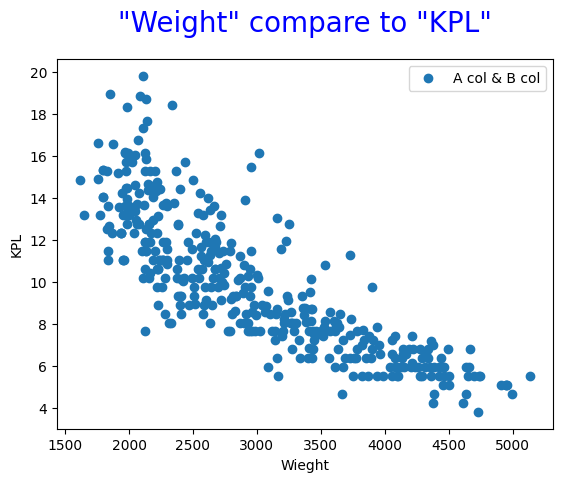

In [153]:
#  연비와 무게 관계 시각화
xdata=mpgDF['weight']
ydata=mpgDF['kpl']
print(xdata.shape, ydata.shape)
plt.plot(xdata,ydata,'o',label=['A col & B col'])
plt.legend()
plt.title(label='"Weight" compare to "KPL"', fontdict={'size':20, 'color':'blue'} ,pad=20)
plt.xlabel('Wieght')
plt.ylabel('KPL')
plt.plot

(392,) (392,)


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

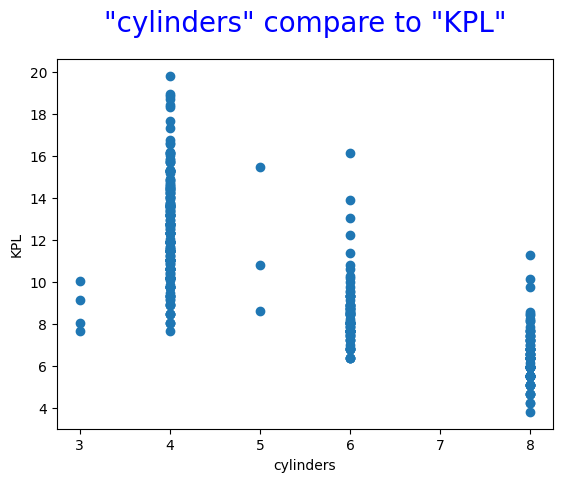

In [156]:
#  연비와  관계 시각화
xdata=mpgDF['cylinders']
ydata=mpgDF['kpl']
print(xdata.shape, ydata.shape)
plt.plot(xdata,ydata,'o')
plt.title(label='"cylinders" compare to "KPL"', fontdict={'size':20, 'color':'blue'} ,pad=20)
plt.xlabel('cylinders')
plt.ylabel('KPL')
plt.plot

In [161]:
mpgDF3=mpgDF.columns.drop('car name')
corrDF=mpgDF[mpgDF3].corr()
corrDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,kpl
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,1.000000
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.777618
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.805127
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.832244
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.423329
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.580541
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.565209
kpl,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,1.000000
